## Final Project Submission

Please fill out:
* Student name: Farnaz Golnam
* Student pace: Full time
* Scheduled project review date/time: Feb 24th, 12pm PST
* Instructor name: Rafael Cassaro
* Blog post URL: https://datasciencefordesigners.wordpress.com/2020/01/27/data-driven-decision-making/

#### Exploratory data analysis:

duting working with the king-county housing price dataset, some questions have arisen:

#### 1. How does the location affect the housing prices?
#### 2. How does renovation affect the housing price?
#### 3. How much difference is between the price of hoses with the waterfront view and others?
#### 4. what are the most affective factors on the housing price?

# importing libraries and dataframe
To answer these questions we are going to use some of our visual graphs and also dataframes.

First we import our necessary libraries and load our cleaned and saved dataframe from our cleaning process.

In [1]:
#Datarames and Computation
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
#contexts available: poster, paper, talk, notebook
sns.set_context('paper')

#STATSMODELS

#statistical analysis & regression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

#PICKLE for saving objects
import pickle

In [2]:
with open('df_clean.pickle','rb') as f:
    df_clean = pickle.load(f)

df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15
1,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,7,2170,400.0,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.0,770,10000,1.0,0.0,0.0,6,770,0.0,1933.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,7,1050,910.0,1965.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,8,1680,0.0,1987.0,47.6168,-122.045,1800,7503
7,291850.0,3,1.5,1060,9711,1.0,0.0,0.0,7,1060,0.0,1963.0,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.5,1310,1294,2.0,0.0,0.0,8,1180,130.0,2008.0,47.5773,-122.409,1330,1265
21592,360000.0,3,2.5,1530,1131,3.0,0.0,0.0,8,1530,0.0,2009.0,47.6993,-122.346,1530,1509
21593,400000.0,4,2.5,2310,5813,2.0,0.0,0.0,8,2310,0.0,2014.0,47.5107,-122.362,1830,7200
21594,402101.0,2,0.5,1020,1350,2.0,0.0,0.0,7,1020,0.0,2009.0,47.5944,-122.299,1020,2007


# 1.Location

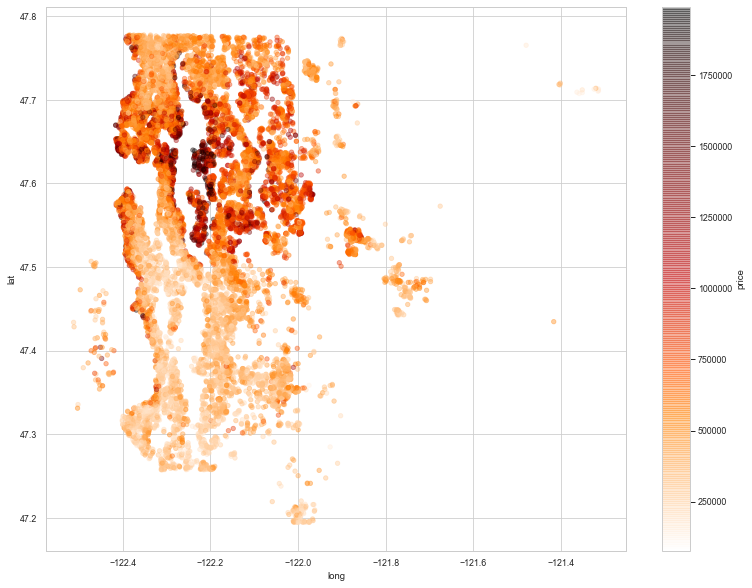

In [9]:
# let’s color code from the most expensive to the least expensive areas:
df_clean.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(13,10), 
        c="price", cmap="gist_heat_r", colorbar=True, sharex=False);

Text(0.5, 1.02, 'Relationship between price and Latitude-Longitude coordinate')

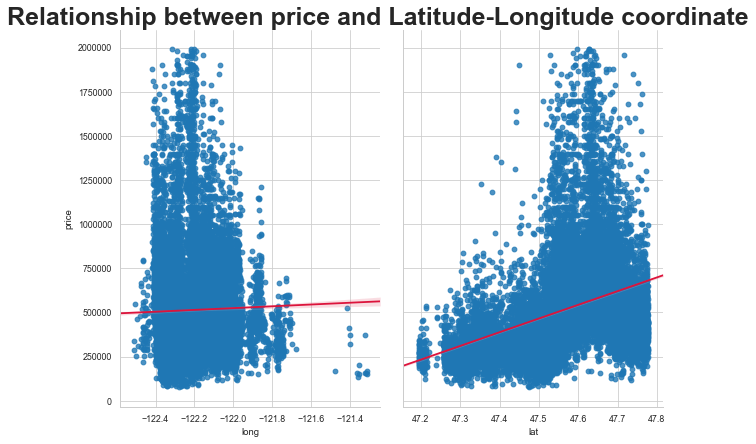

In [8]:
sns.pairplot(x_vars=['long','lat'],y_vars='price',data=df_clean,kind='reg',plot_kws={'line_kws':{'color':'crimson'}},height=6, aspect=0.7)

plt.suptitle('Relationship between price and Latitude-Longitude coordinate', size=25, weight='bold', y=1.02)

### Observations:

as we can see the latitude(northern-southern) direction has a linear and strong effect on the price but longtitude coordinate(western_eastern) direction, doesnt have much of effect on price.

# 2.Renovation

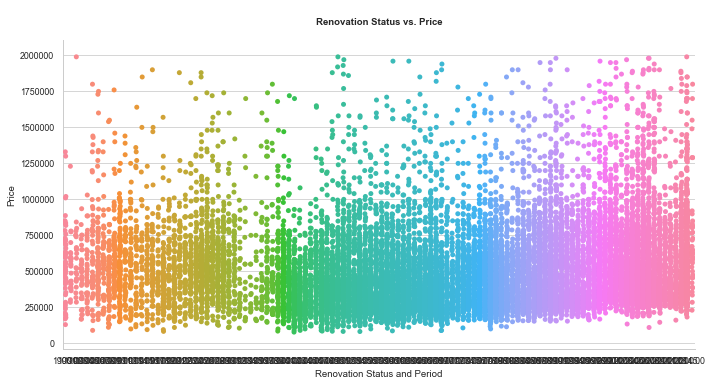

In [37]:
# renovation vs price
sns.catplot(x="yr_renovated", y="price", data=df_clean, height=5, aspect=2)
plt.title('\nRenovation Status vs. Price\n', fontweight='bold')
plt.xlabel('Renovation Status and Period')
plt.ylabel('Price');

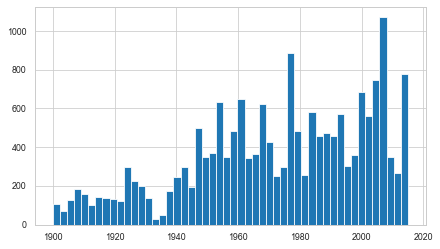

In [38]:
df_clean["yr_renovated"].hist(bins= 50, figsize  = [7, 4])

### observations:
It looks like the more recent the renovation happened the more the prices spread upwards.

# 3.waterfront

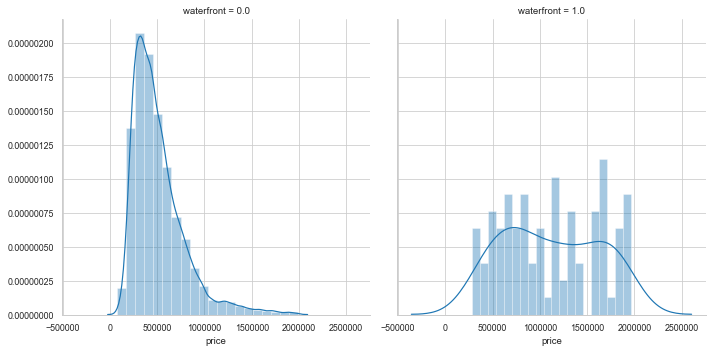

In [23]:
# lets check the distribution of the price based on waterfront categoriy:
g = sns.FacetGrid(df_clean, col="waterfront", margin_titles=True, height=5)
g = g.map(sns.distplot , "price", bins=20)

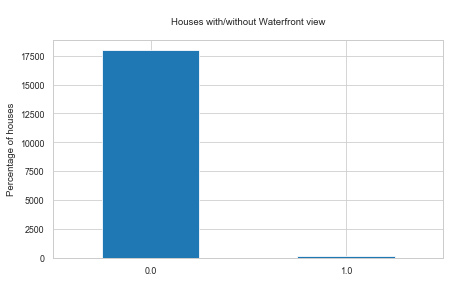

In [30]:
# lets check the quantity of "waterfront" vs "non-waterfront" properties:
df_clean.waterfront.value_counts().plot.bar(rot=0, sort_columns=True, 
                                                    title="\nHouses with/without Waterfront view\n", figsize=(7,4))
plt.ylabel('Percentage of houses');

### Observations:
1. As we can see in the KDE plots, the distribution of price is completely different in waterfront and non-waterfront options. the mean of the price is higher for the waterfront properties.

2. only small percentage (less than 1%) of housing options have waterfront view.

# 4.most important factors affect the housing price

After trying different combinations for our linear model, we got to the final point that the below combination of predictors are the best and most effective combination for the model.¶

### ['grade' ,'sqft_living', 'waterfront', 'lat', 'yr_renovated']


Text(0.5, 1.02, 'Pair Plots of Relationship between predictors and target variable(price)')

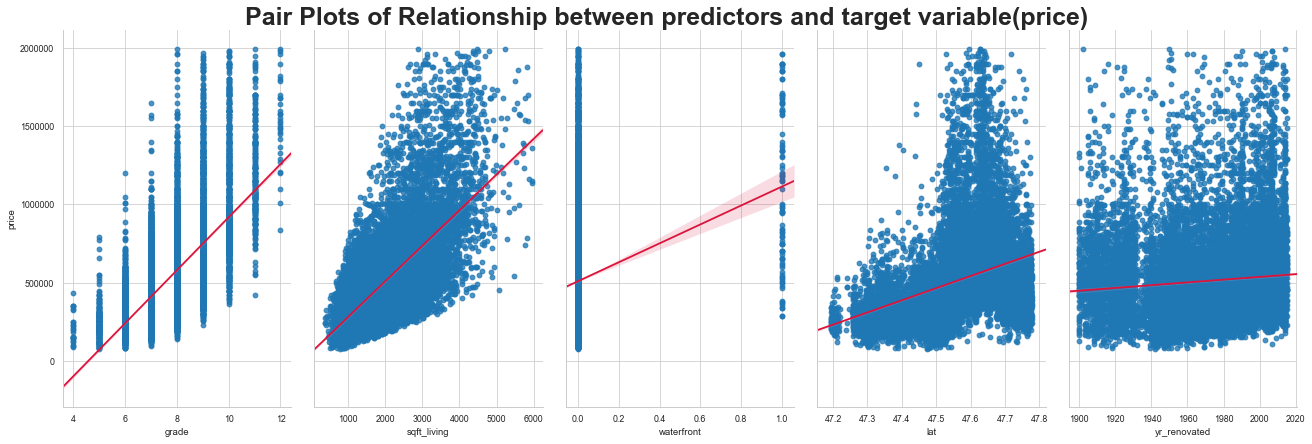

In [36]:
sns.pairplot(x_vars=['grade' ,'sqft_living', 'waterfront', 'lat', 'yr_renovated'], 
             y_vars='price', data=df_clean, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.6)

plt.suptitle('Pair Plots of Relationship between predictors and target variable(price)', size=25, weight='bold', y=1.02)

#### we can use the constant and coefficient of each factor to make the price equation and estimate the price, coefficients give us the statistical relationship between variables:

>Estimated_price= -0.067 + 0.5 Grade + 0.39 Sqft_living + 0.2 waterfront + 0.25 lat - 0.1 yr_renovated.

#### among them 'grade' and 'sqft_living' are the most important one.

Text(0, 0.5, 'Price')

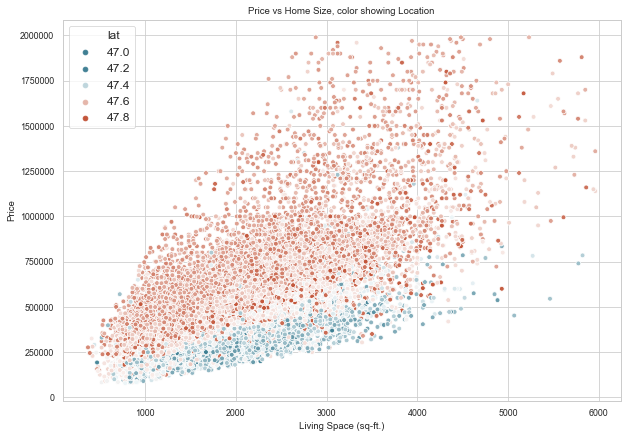

In [58]:
#Scatter sqft_living vs price
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
cmap = sns.diverging_palette(220, 20, n=7, as_cmap=True)
#palette='cubehelix'
sns.scatterplot(df_clean['sqft_living'], df_clean['price'], hue=df_clean['lat'], palette=cmap)
plt.legend(loc='upper left', fontsize='12')
plt.title("Price vs Home Size, color showing Location")
plt.xlabel('Living Space (sq-ft.)')
plt.ylabel('Price')

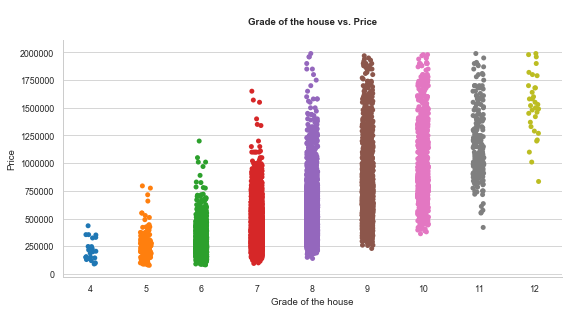

In [60]:
sns.catplot(x="grade", y="price", data=df_clean, height=4, aspect=2)
plt.title('\nGrade of the house vs. Price\n', fontweight='bold')
plt.xlabel('Grade of the house')
plt.ylabel('Price');